<a href="https://colab.research.google.com/github/STEVEYEONG/CryptoPricePredict/blob/main/DataGet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git
!pip install mplfinance


In [ ]:
# from tvDatafeed import TvDatafeed, Interval, TvDatafeedLive

# # username = 'steveyy2001'
# # password = 'Sy@@'

# tv = TvDatafeed()

# # index
# index_data = tv.get_hist(symbol='BTCUSD',exchange='Binance',interval=Interval.in_daily,n_bars=10000)

# # Export to CSV
# index_data.to_csv('/content/FYP_Data/btcusdbinanced1.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load data (assuming it's already done)
file_path = '/content/drive/MyDrive/DataSet/btcusdbinanced1.csv'
data = pd.read_csv(file_path)

# Ensure the datetime column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)  # Set the datetime as the index


In [ ]:
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-12-04 to 2024-08-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1000 non-null   object 
 1   open    1000 non-null   float64
 2   high    1000 non-null   float64
 3   low     1000 non-null   float64
 4   close   1000 non-null   float64
 5   volume  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB
None
               open          high           low         close        volume
count   1000.000000   1000.000000   1000.000000   1000.000000  1.000000e+03
mean   36756.788140  37508.257140  35953.633800  36760.774940  3.717244e+04
std    15984.335848  16323.407952  15587.056543  15990.154644  1.932293e+05
min    15762.870000  16282.440000  15479.250000  15755.850000  6.072490e+00
25%    23620.717500  24239.802500  23212.285000  23618.005000  3.459537e+02
50%    30387.335000  30781.720000  29842.815000  30389.045000  9.7

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


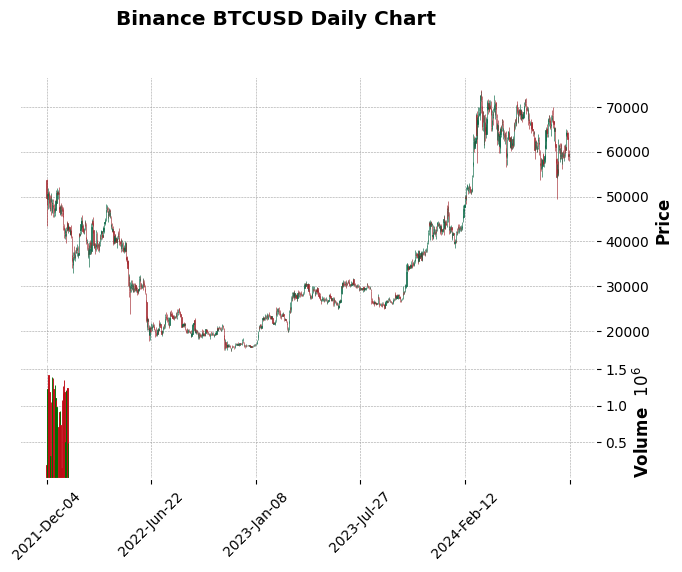

In [ ]:
import mplfinance as mpf

# Plot the candlestick chart with volume
mpf.plot(data, type='candle', volume=True, title='Binance BTCUSD Daily Chart', style='charles')


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


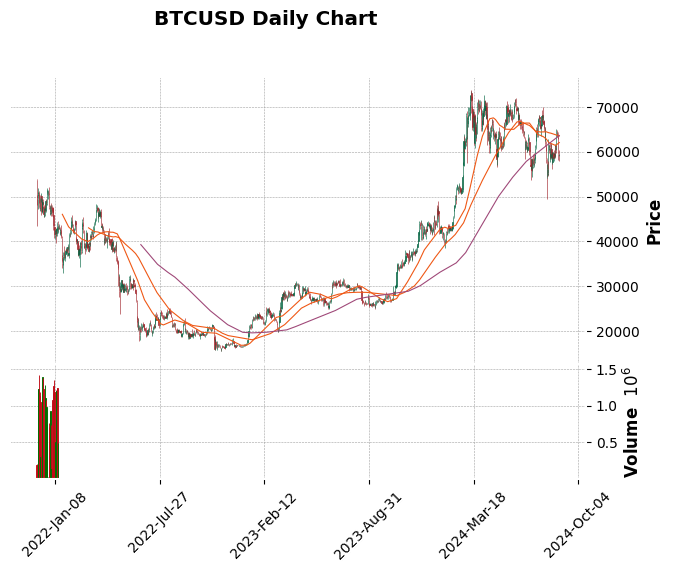

In [ ]:
mpf.plot(
    data,
    type='candle',
    volume=True,
    title='BTCUSD Daily Chart',
    style='charles',
    mav=(50, 100, 200),  # Moving averages for 5, 10, and 20 days
    show_nontrading=True
)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data (assuming it's already done)
file_path = '/content/drive/MyDrive/DataSet/btcusdbinanced1.csv'
data = pd.read_csv(file_path)

# Ensure the datetime column is in datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)  # Set the datetime as the index

# Check available columns and correct the column name if necessary
print(data.columns)  # Print the column names to verify

# Scale the data using the correct column name (adjust if needed)
scaler = MinMaxScaler(feature_range=(0, 1))
# Replace 'Close' with the actual name of the closing price column if it's different
scaled_data = scaler.fit_transform(data[['close']])

Index(['symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Preparing the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using the last 60 days to predict the next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
24/24 [==============================] - 5s 52ms/step - loss: 0.0193
Epoch 2/25
24/24 [==============================] - 1s 53ms/step - loss: 0.0028
Epoch 3/25
24/24 [==============================] - 1s 52ms/step - loss: 0.0023
Epoch 4/25
24/24 [==============================] - 1s 54ms/step - loss: 0.0022
Epoch 5/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0019
Epoch 6/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0019
Epoch 7/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0017
Epoch 8/25
24/24 [==============================] - 2s 73ms/step - loss: 0.0017
Epoch 9/25
24/24 [==============================] - 1s 54ms/step - loss: 0.0016
Epoch 10/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0016
Epoch 11/25
24/24 [==============================] - 1s 55ms/step - loss: 0.0015
Epoch 12/25
24/24 [==============================] - 1s 53ms/step - loss: 0.0014
Epoch 13/25
24/24 [==================

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

# Calculating RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('RMSE:', rmse)


5/5 [==============================] - 2s 101ms/step
RMSE: 62596.33718015407


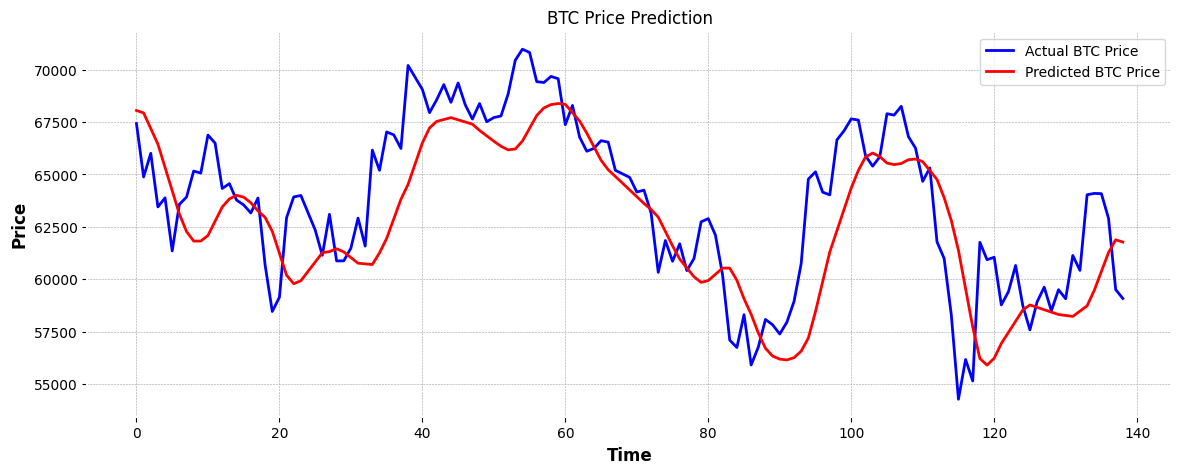

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Calculate Moving Averages
data['MA50'] = data['close'].rolling(window=50).mean()
data['MA200'] = data['close'].rolling(window=200).mean()

# RSI Calculation (14 days)
delta = data['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Drop NaN values created by rolling windows
data = data.dropna()

# Scale the data
features = ['close', 'MA50', 'MA200', 'RSI']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])


In [ ]:
time_step = 100  # Increase the time step to capture longer trends
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [19]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

# Assuming 'close' is the target variable and the only feature
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Now X_train has the correct shape
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
22/22 [==============================] - 33s 511ms/step - loss: 0.0101
Epoch 2/50
22/22 [==============================] - 14s 644ms/step - loss: 0.0022
Epoch 3/50
22/22 [==============================] - 12s 544ms/step - loss: 0.0018
Epoch 4/50
22/22 [==============================] - 13s 599ms/step - loss: 0.0018
Epoch 5/50
22/22 [==============================] - 11s 499ms/step - loss: 0.0016
Epoch 6/50
22/22 [==============================] - 14s 649ms/step - loss: 0.0016
Epoch 7/50
22/22 [==============================] - 10s 447ms/step - loss: 0.0015
Epoch 8/50
22/22 [==============================] - 18s 839ms/step - loss: 0.0014
Epoch 9/50
22/22 [==============================] - 13s 597ms/step - loss: 0.0014
Epoch 10/50
22/22 [==============================] - 12s 550ms/step - loss: 0.0013
Epoch 11/50
22/22 [==============================] - 13s 583ms/step - loss: 0.0013
Epoch 12/50
22/22 [==============================] - 12s 551ms/step - loss: 0.0011
Epoch 13/50
2

In [21]:
# @title
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
22/22 [==============================] - 13s 596ms/step - loss: 6.2873e-04 - val_loss: 0.0013
Epoch 2/100
22/22 [==============================] - 14s 673ms/step - loss: 5.3999e-04 - val_loss: 0.0033
Epoch 3/100
22/22 [==============================] - 15s 694ms/step - loss: 5.4321e-04 - val_loss: 0.0013
Epoch 4/100
22/22 [==============================] - 13s 601ms/step - loss: 5.3670e-04 - val_loss: 0.0012
Epoch 5/100
22/22 [==============================] - 14s 668ms/step - loss: 6.7058e-04 - val_loss: 0.0012
Epoch 6/100
22/22 [==============================] - 12s 561ms/step - loss: 5.5121e-04 - val_loss: 0.0014
Epoch 7/100
22/22 [==============================] - 13s 606ms/step - loss: 4.7135e-04 - val_loss: 0.0010
Epoch 8/100
22/22 [==============================] - 13s 596ms/step - loss: 5.4941e-04 - val_loss: 0.0019
Epoch 9/100
22/22 [==============================] - 13s 625ms/step - loss: 6.2831e-04 - val_loss: 0.0021
Epoch 10/100
22/22 [==========================

Predictions shape: (139,)
Actual prices shape: (99,)
First few predicted prices: [3.90633401e+09 3.89961827e+09 3.85922293e+09 3.81416613e+09
 3.75178970e+09]
First few actual prices: [69059.69 67950.86 68563.83 69290.84 68443.99]


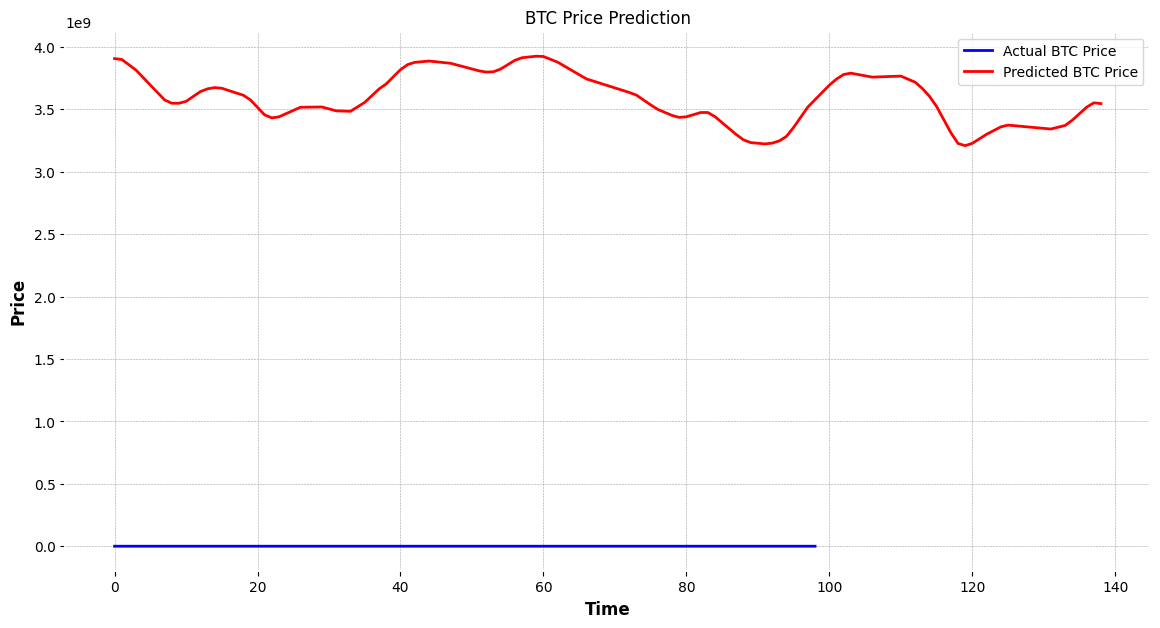

In [22]:
# Reshape predictions to have the same number of features as the original data
predictions = predictions.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Create a dummy array with the required number of features (3 dummy features to match original data)
dummy_data = np.zeros((predictions.shape[0], 3))

# Concatenate predictions with the dummy array
predictions_with_dummy = np.concatenate((predictions, dummy_data), axis=1)

# Now inverse transform the concatenated array
predictions = scaler.inverse_transform(predictions_with_dummy)

# Extract the actual predictions (first column)
predictions = predictions[:, 0]

# Prepare y_test for inverse transformation
other_features_test = np.zeros((y_test.shape[0], 3))  # Same dummy features for y_test

# Combine y_test (as 'close') with the placeholder features
y_test_with_features = np.concatenate((y_test.reshape(-1, 1), other_features_test), axis=1)

# Calculate actual prices in original scale
actual_prices = scaler.inverse_transform(y_test_with_features)
actual_prices = actual_prices[:, 0]

# Debug: Print shapes and first few values to ensure correctness
print("Predictions shape:", predictions.shape)
print("Actual prices shape:", actual_prices.shape)
print("First few predicted prices:", predictions[:5])
print("First few actual prices:", actual_prices[:5])

# Plot the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(actual_prices, color='blue', label='Actual BTC Price')
plt.plot(predictions, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

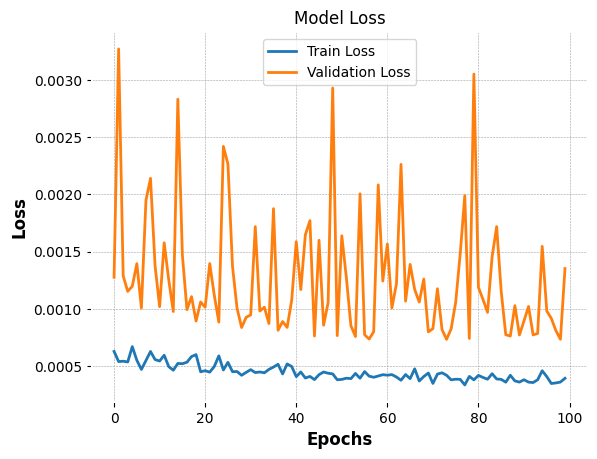

ValueError: Found input variables with inconsistent numbers of samples: [99, 139]

In [25]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predictions)
mae = mean_absolute_error(actual_prices, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


In [26]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [27]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))


In [28]:
data['lag1'] = data['close'].shift(1)
data['lag2'] = data['close'].shift(2)


In [29]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'data' is your DataFrame containing features and target
# Replace 'feature_columns' with the actual names of your feature columns
feature_columns = ['open', 'high', 'low', 'lag1', 'lag2']
X = data[feature_columns].values  # Extract features into a NumPy array
y = data['close'].values  # Extract target variable

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Feature Engineering (Lagged Features)
data['lag1'] = data['close'].shift(1)
data['lag2'] = data['close'].shift(2)
data = data.dropna()  # Remove rows with NaN values introduced by lagging

# Define feature columns and target variable
feature_columns = ['open', 'high', 'low', 'lag1', 'lag2']
X = data[feature_columns].values
y = data['close'].values

# Time Series Split for Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the input features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the LSTM model architecture
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    # Compile the model with gradient clipping
    optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model (add your evaluation metrics here)
    # ...

Epoch 1/100
5/5 [==============================] - 7s 456ms/step - loss: 436323744.0000 - val_loss: 402182368.0000
Epoch 2/100
5/5 [==============================] - 1s 244ms/step - loss: 436314688.0000 - val_loss: 402172032.0000
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 436298688.0000 - val_loss: 402149440.0000
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 436263936.0000 - val_loss: 402098144.0000
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 436187072.0000 - val_loss: 402008032.0000
Epoch 6/100
5/5 [==============================] - 0s 35ms/step - loss: 436050880.0000 - val_loss: 401909056.0000
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 435895968.0000 - val_loss: 401825536.0000
Epoch 8/100
5/5 [==============================] - 0s 34ms/step - loss: 435780672.0000 - val_loss: 401742336.0000
Epoch 9/100
5/5 [==============================] - 0s 25ms/step - loss: 435719808.0000

5/5 [==============================] - 1s 201ms/step
Mean Squared Error (MSE): 4032722619.37487
Mean Absolute Error (MAE): 63381.67428436968


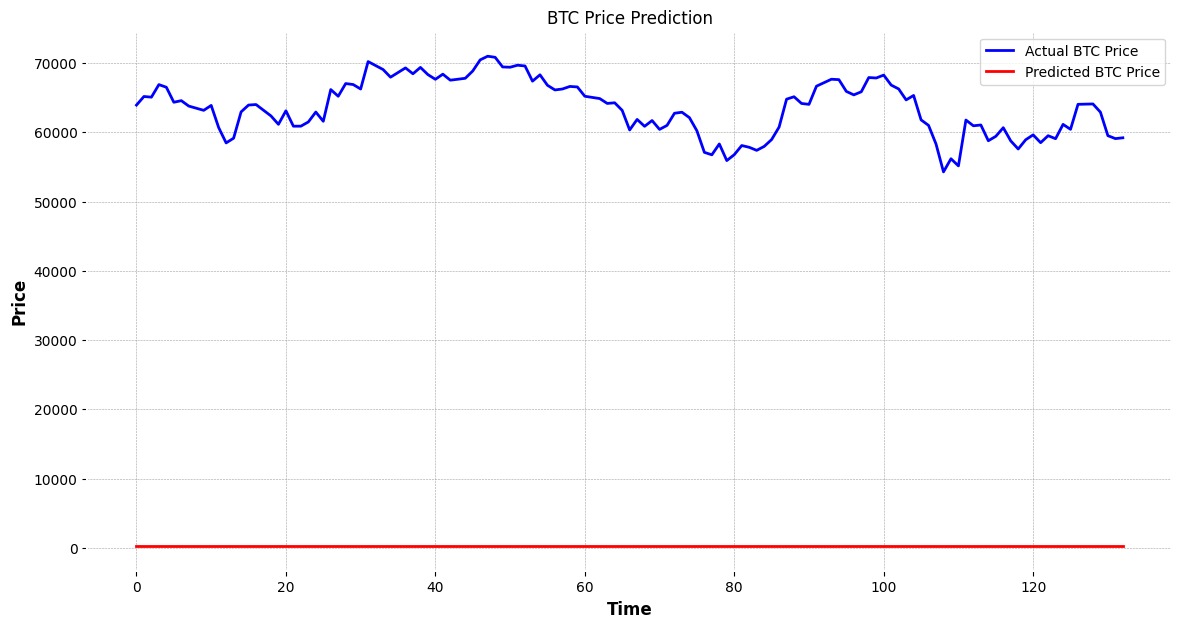

In [37]:

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Plot the actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_pred, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
from keras.layers import Bidirectional

# Reshape the input data to be 3D [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2]))) # Now X_train.shape[2] will be 1
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

In [41]:
# Adding more lag features or indicators
data['lag3'] = data['close'].shift(3)
data['lag4'] = data['close'].shift(4)
data['MA10'] = data['close'].rolling(window=10).mean()  # Moving average as a feature
data = data.dropna()


In [42]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning (simplified)
param_grid = {
    'units': [50, 100, 150],
    'dropout': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0001]
}


In [43]:
time_step = 50  # Increase look-back period


In [46]:
from keras.layers import GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model architecture
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# Compile the model
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/200
21/21 [==============================] - 9s 71ms/step - loss: 1122409984.0000 - val_loss: 4061034496.0000 - lr: 1.0000e-04
Epoch 2/200
21/21 [==============================] - 0s 14ms/step - loss: 1122402816.0000 - val_loss: 4061006592.0000 - lr: 1.0000e-04
Epoch 3/200
21/21 [==============================] - 0s 15ms/step - loss: 1122394112.0000 - val_loss: 4060971520.0000 - lr: 1.0000e-04
Epoch 4/200
21/21 [==============================] - 0s 14ms/step - loss: 1122382464.0000 - val_loss: 4060923904.0000 - lr: 1.0000e-04
Epoch 5/200
21/21 [==============================] - 0s 17ms/step - loss: 1122367104.0000 - val_loss: 4060856320.0000 - lr: 1.0000e-04
Epoch 6/200
21/21 [==============================] - 0s 15ms/step - loss: 1122344192.0000 - val_loss: 4060757504.0000 - lr: 1.0000e-04
Epoch 7/200
21/21 [==============================] - 0s 14ms/step - loss: 1122312320.0000 - val_loss: 4060611072.0000 - lr: 1.0000e-04
Epoch 8/200
21/21 [==============================] - 0s

In [47]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


5/5 [==============================] - 0s 8ms/step - loss: 4054154496.0000
Test Loss: 4054154496.0


In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


5/5 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 4054154765.3022265
Mean Absolute Error (MAE): 63550.52148489242


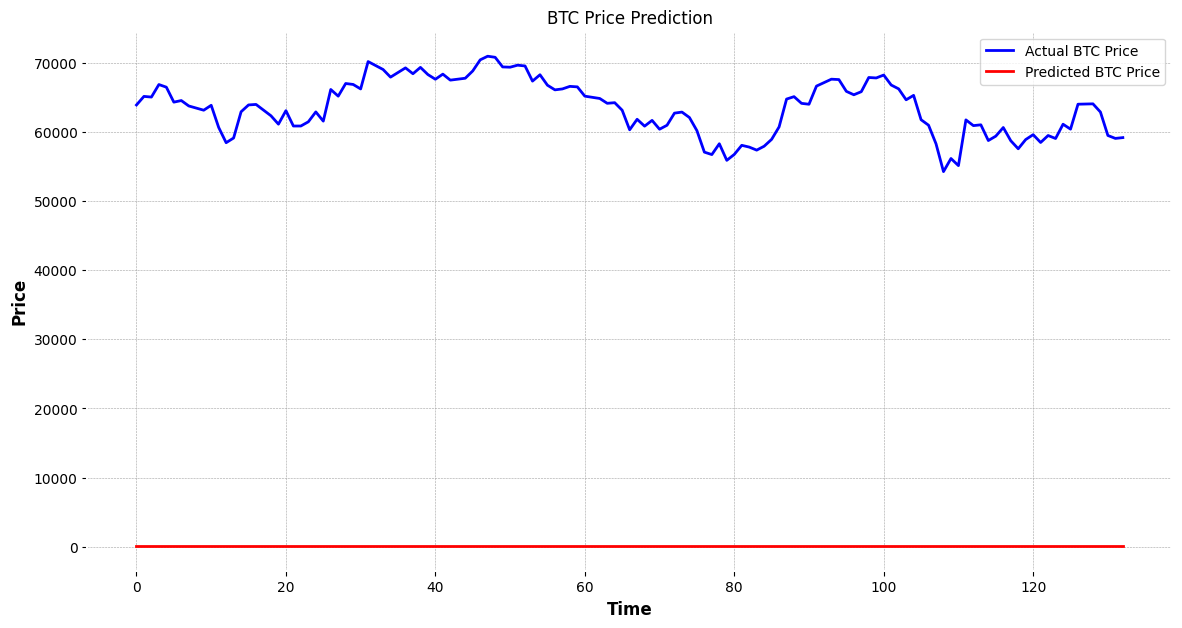

In [49]:
# Plot actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_pred, color='red', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [50]:
model.add(Dense(units=1))  # This should output a single value


In [51]:
# Assuming you have a 2D array, you need to reshape it before feeding it to the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [52]:
# Fit the scaler on training data and transform both train and test data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# When predicting, make sure to reshape back to the original scale
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred)


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.